# Analysis of Psychological Treatment for Depression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as mse
pd.options.mode.chained_assignment = None

Overview
In this project, I conducted an analysis on a group of subjects characterized by depression. The primary objective was to investigate the effectiveness of psychological treatment in alleviating the symptoms of depression and improving overall well-being. The analysis involved administering a correlation test to the participants before and after the treatment to evaluate any changes in their test scores and assess the correlation between treatment and symptom relief.

In [3]:
url= 'https://raw.githubusercontent.com/hadarkosto/final-project-AX/main/the%20depression%20dataset.csv'
dep_df1 = pd.read_csv(url) 
dep_df= dep_df1.copy(deep= True)
dep_df.head()

number  days  gender    age  afftype  melanch  inpatient    edu  \
0  condition_1    11       2  35-39      2.0      2.0        2.0  06-10   
1  condition_2    18       2  40-44      1.0      2.0        2.0  06-10   
2  condition_3    13       1  45-49      2.0      2.0        2.0  06-10   
3  condition_4    13       2  25-29      2.0      2.0        2.0  11-15   
4  condition_5    13       2  50-54      2.0      2.0        2.0  11-15   

   marriage  work  madrs1  madrs2  
0       1.0   2.0    19.0    19.0  
1       2.0   2.0    24.0    11.0  
2       2.0   2.0    24.0    25.0  
3       1.0   1.0    20.0    16.0  
4       2.0   2.0    26.0    26.0

In [3]:
dep_df['afftype'] = dep_df['afftype'].replace([1,2,3],['bipolar II','unipolar depressive','bipolar I'])
new_a=pd.get_dummies(dep_df[['afftype']])
dep_df = pd.concat([dep_df,new_a],axis=1)


dep_df['gender'] = dep_df['gender'].replace([1,2],['F','M'])  #שינוי הערכים בעמודה של המין לגבר אישה במקום 1,2
dep_df_split= pd.get_dummies(dep_df['gender'])
dep_df = pd.concat([dep_df ,dep_df_split],axis=1) 

dep_df.head()

#Arrangement of the "gender" column according to man or woman

number  days gender    age              afftype  melanch  inpatient  \
0  condition_1    11      M  35-39  unipolar depressive      2.0        2.0   
1  condition_2    18      M  40-44           bipolar II      2.0        2.0   
2  condition_3    13      F  45-49  unipolar depressive      2.0        2.0   
3  condition_4    13      M  25-29  unipolar depressive      2.0        2.0   
4  condition_5    13      M  50-54  unipolar depressive      2.0        2.0   

     edu  marriage  work  madrs1  madrs2  afftype_bipolar I  \
0  06-10       1.0   2.0    19.0    19.0                  0   
1  06-10       2.0   2.0    24.0    11.0                  0   
2  06-10       2.0   2.0    24.0    25.0                  0   
3  11-15       1.0   1.0    20.0    16.0                  0   
4  11-15       2.0   2.0    26.0    26.0                  0   

   afftype_bipolar II  afftype_unipolar depressive  F  M  
0                   0                            1  0  1  
1                   1                            0  0  1  
2                   0                            1  1  0  
3                   0                            1  0  1  
4                   0                            1  0  1

In [4]:
# Adding a column called "Numbers" that numbers the rowsdep_df['Numbers']=1
for i in range(0, len(dep_df['number'])):
    dep_df['Numbers'][i]=int(i)+1


In [5]:
by_age = dep_df.groupby('age')['Numbers'].count()# Scheme of the number of people in each age range

# Data Collection and Methodology
 

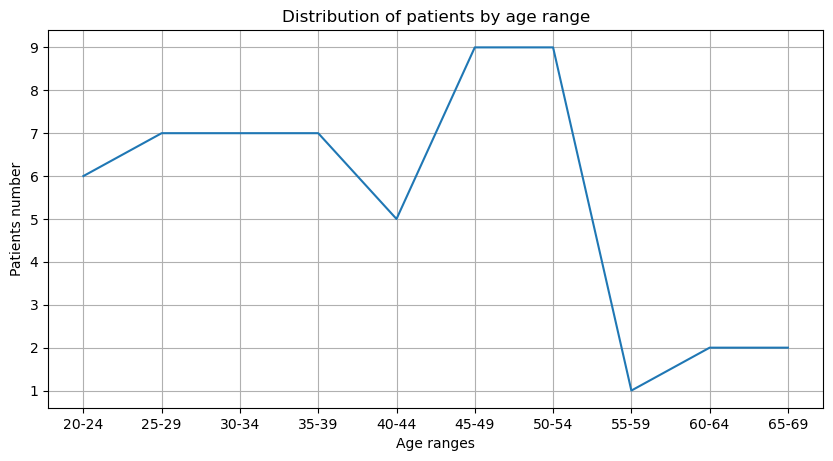

In [6]:
plt.figure(figsize=(10, 5), dpi = 100)

plt.title('Distribution of patients by age range')

plt.plot(by_age.index, by_age.values)

plt.ylabel('Patients number')
plt.xlabel('Age ranges')
plt.grid()
plt.show()


It can be seen that the majority of the population participating in the study were in the age range of 45-54

In [7]:
dep_df['edu'][21]='Unknown' 
dep_df= dep_df.dropna() #הורדת קבוצת הביקורת (תוך הורדת ערכים חסרים)
dep_df

number  days gender    age              afftype  melanch  inpatient  \
0    condition_1    11      M  35-39  unipolar depressive      2.0        2.0   
1    condition_2    18      M  40-44           bipolar II      2.0        2.0   
2    condition_3    13      F  45-49  unipolar depressive      2.0        2.0   
3    condition_4    13      M  25-29  unipolar depressive      2.0        2.0   
4    condition_5    13      M  50-54  unipolar depressive      2.0        2.0   
5    condition_6     7      F  35-39  unipolar depressive      2.0        2.0   
9   condition_10     9      M  45-49  unipolar depressive      2.0        2.0   
10  condition_11    14      F  45-49  unipolar depressive      2.0        2.0   
11  condition_12    12      M  40-44           bipolar II      2.0        2.0   
12  condition_13    14      M  35-39           bipolar II      2.0        2.0   
13  condition_14    14      F  60-64           bipolar II      2.0        2.0   
14  condition_15    13      M  55-59  unipolar depressive      2.0        2.0   
15  condition_16    16      F  45-49  unipolar depressive      2.0        2.0   
16  condition_17    13      F  50-54           bipolar II      2.0        2.0   
17  condition_18    13      M  40-44            bipolar I      2.0        2.0   
18  condition_19    13      M  50-54  unipolar depressive      2.0        1.0   
19  condition_20    13      F  30-34  unipolar depressive      1.0        1.0   
20  condition_21    13      M  35-39  unipolar depressive      2.0        1.0   
21  condition_22    14      F  65-69  unipolar depressive      2.0        1.0   
22  condition_23    16      F  30-34  unipolar depressive      2.0        1.0   

        edu  marriage  work  madrs1  madrs2  afftype_bipolar I  \
0     06-10       1.0   2.0    19.0    19.0                  0   
1     06-10       2.0   2.0    24.0    11.0                  0   
2     06-10       2.0   2.0    24.0    25.0                  0   
3     11-15       1.0   1.0    20.0    16.0                  0   
4     11-15       2.0   2.0    26.0    26.0                  0   
5     06-10       1.0   2.0    18.0    15.0                  0   
9     06-10       1.0   2.0    28.0    21.0                  0   
10    06-10       1.0   2.0    24.0    24.0                  0   
11    06-10       2.0   2.0    25.0    21.0                  0   
12    11-15       2.0   2.0    18.0    13.0                  0   
13    06-10       2.0   2.0    28.0    19.0                  0   
14    11-15       1.0   1.0    14.0    18.0                  0   
15    11-15       1.0   2.0    13.0    17.0                  0   
16    06-10       1.0   2.0    17.0    15.0                  0   
17    11-15       2.0   2.0    18.0    15.0                  1   
18    16-20       2.0   2.0    26.0    21.0                  0   
19    06-10       1.0   2.0    27.0    25.0                  0   
20    06-10       2.0   2.0    26.0    21.0                  0   
21  Unknown       2.0   2.0    29.0    28.0                  0   
22    16-20       2.0   2.0    29.0    23.0                  0   

    afftype_bipolar II  afftype_unipolar depressive  F  M  Numbers  
0                    0                            1  0  1        1  
1                    1                            0  0  1        2  
2                    0                            1  1  0        3  
3                    0                            1  0  1        4  
4                    0                            1  0  1        5  
5                    0                            1  1  0        6  
9                    0                            1  0  1       10  
10                   0                            1  1  0       11  
11                   1                            0  0  1       12  
12                   1                            0  0  1       13  
13                   1                            0  1  0       14  
14                   0                            1  0  1       15  
15                   0  

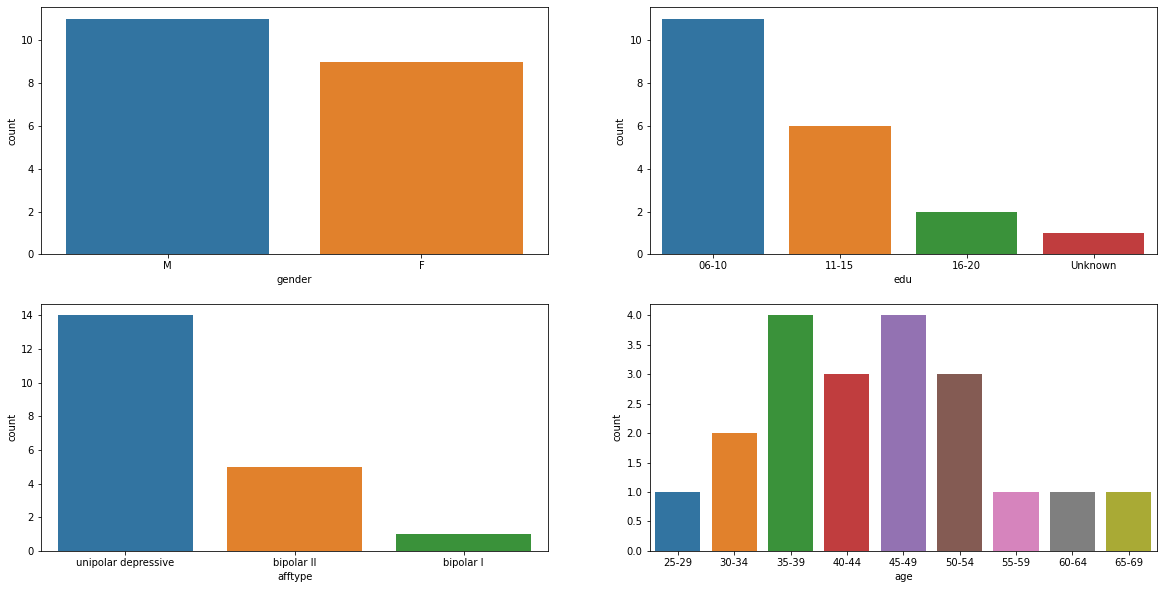

In [8]:
fig, axes = plt.subplots(figsize=(20, 10), ncols= 2, nrows=2)
sns.countplot(ax=axes[0][0], x="gender", data=dep_df)
sns.countplot(ax=axes[0][1], x="edu", data=dep_df)
sns.countplot(ax=axes[1][0], x="afftype", data=dep_df)
sortedage= dep_df.sort_values('age',ascending=True)
sns.countplot(ax=axes[1][1], x="age", data=sortedage)
plt.show()


#### :יצירת ממוצע של מספר שנות לימוד

In [9]:
dep_df['edu'][21]='00-00'
#יש ערך ריק ולכן מילאנו אותו ב0

lst=dep_df['edu'].tolist()
for row in range(0,20):
    newvalue=dep_df['edu'].iloc[row].split('-')
    newvalue=(int(newvalue[0])+int(newvalue[-1]))/2 ##ממוצע
    lst[row] =int(newvalue)
    
dep_df['edu']=lst

<AxesSubplot:>

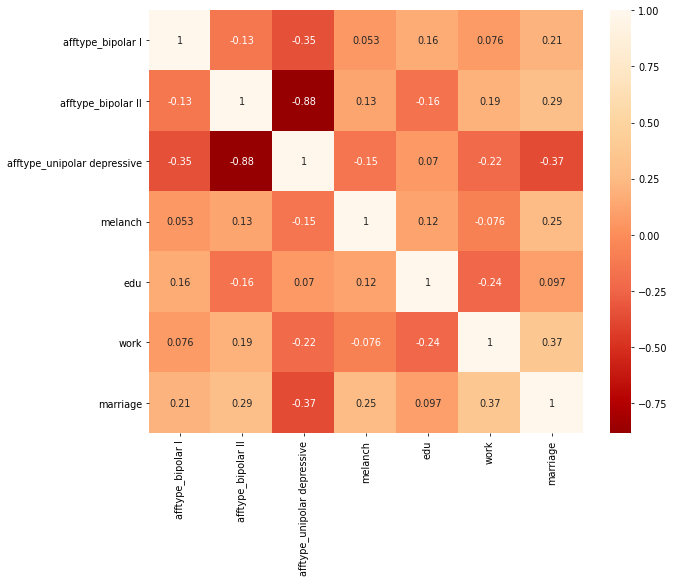

In [10]:
plt.figure(figsize=(10, 8), dpi =70)   
plt.subplots_adjust(wspace=0.4)
features1=['afftype_bipolar I','afftype_bipolar II','afftype_unipolar depressive','melanch','edu', 'work','marriage']
corrs1 = dep_df[features1].corr(method = 'pearson')
    
sns.heatmap(corrs1,cmap='OrRd_r', center=0, annot = True)

<div style="direction:rtl"> 
It can be seen that there is a connection between being married and the types of diseases, this is a correlation that affects and is relevant to the data
</div> 

## Investigating the Relationship Between Marital Status and Disease Types
##### 1- נשוי
##### 2- לא נשוי 

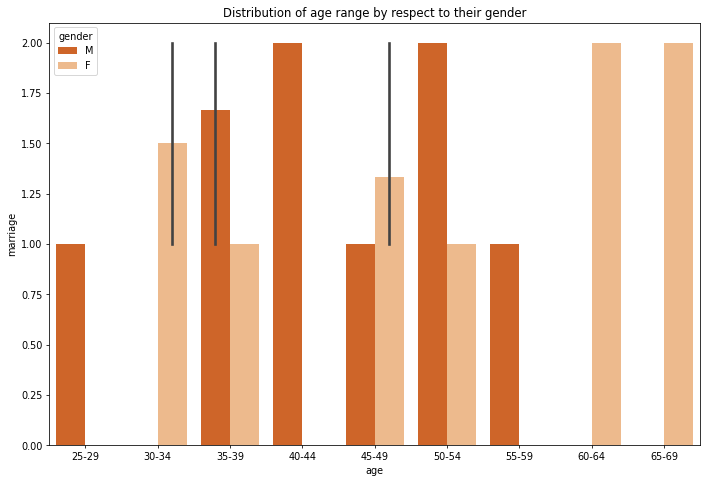

In [11]:
# 1= married , 2= single
sortedage= dep_df.sort_values('age',ascending=True)
plt.figure(figsize=(12, 8), dpi = 70)   
plt.title('Distribution of age range by respect to their gender')
sns.barplot(x = 'age', y = 'marriage', hue = 'gender',palette="Oranges_r", data = sortedage)
plt.show()

The graph shows the distribution of the married-unmarried by gender and age. It can be seen that most of the values are above  This indicates that there was an unmarried majority in most age groups of both genders, but not significantly so.

<AxesSubplot:ylabel='marriage'>

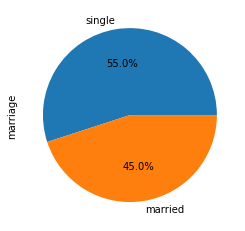

In [12]:
dep_df['marriage'] = dep_df['marriage'].replace([1,2],['married','single'])
dep_df['marriage'].value_counts().plot.pie(autopct='%1.1f%%')

In [13]:
dep_df.groupby('marriage')[['afftype_bipolar II','afftype_bipolar I','afftype_unipolar depressive']].sum()

afftype_bipolar II  afftype_bipolar I  afftype_unipolar depressive
marriage                                                                    
married                    1                  0                            8
single                     4                  1                            6

<AxesSubplot:xlabel='afftype', ylabel='count'>

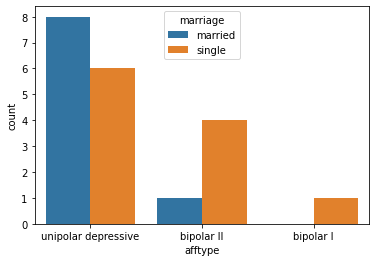

In [14]:
sns.countplot(x="afftype",hue='marriage', data=dep_df)

The graph shows the distribution of the married-unmarried according to the 3 types of depression.

It can be seen from the table that most of those with unipolar depression are married differently from bipolar types one and two


## Investigating the Relationship Between Employment Status and Disease Types

<AxesSubplot:ylabel='work'>

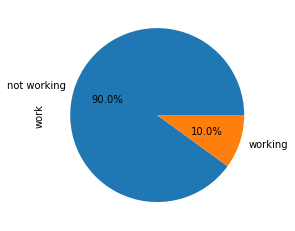

In [15]:
dep_df['work'] = dep_df['work'].replace([1,2],['working','not working'])
dep_df['work'].value_counts().plot.pie(autopct='%1.1f%%')

In [16]:
dep_df.groupby('work')[['afftype_bipolar II','afftype_bipolar I','afftype_unipolar depressive']].sum()

afftype_bipolar II  afftype_bipolar I  \
work                                                 
not working                   5                  1   
working                       0                  0   

             afftype_unipolar depressive  
work                                      
not working                           12  
working                                2

<AxesSubplot:xlabel='afftype', ylabel='count'>

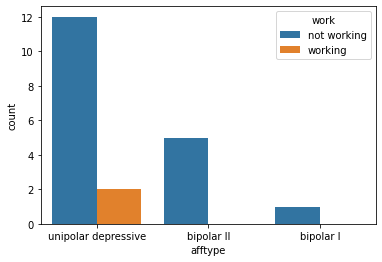

In [17]:
sns.countplot(x="afftype",hue='work', data=dep_df)

It can be seen from the table that most of the unipolar depression sufferers work differently from type one and two bipolars

## Conclusion


1.In contemporary society, marriage and employment are widely regarded as indicators of a conventional way of life. An examination of statistical data reveals a distinct pattern wherein individuals affected by unipolar depression, commonly known as clinical depression, tend to be predominantly married and are the sole ones who successfully assimilate into the workforce. As a result, it can be inferred that this particular ailment exerts a lesser impact on the overall lifestyle of those afflicted by it, relative to individuals affected by other ailments.


Graph showing initial test scores versus final test scores

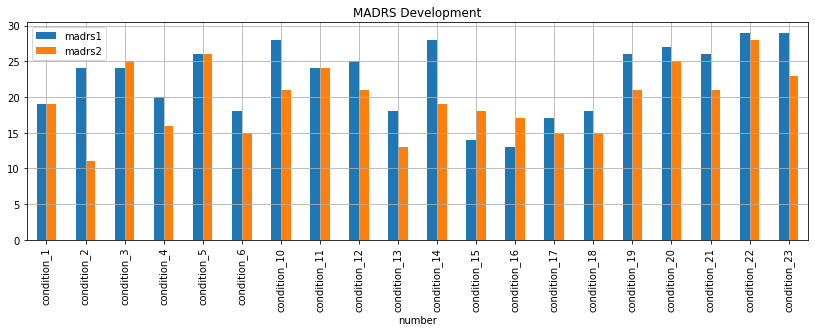

In [18]:
temp_plot_paras = plt.rcParams['figure.figsize']

plt.rcParams['figure.figsize'] = (14,4)
dep_df.plot(x='number', y=['madrs1','madrs2'], kind='bar')
plt.title('MADRS Development')
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = temp_plot_paras

The graph presented displays the grade distribution for both the initial and final tests conducted in each subject as part of the experiment. The test itself comprises questions with varying numerical values assigned to each answer, with a higher cumulative score indicating a higher degree of simulated depression. It is anticipated that the final test scores would exhibit a decline in comparison to the initial test scores, and the graph corroborates this expectation by depicting a noticeable decrease in scores between the two assessments.

In [19]:
dep_df.pivot_table(['afftype_bipolar II','afftype_unipolar depressive','afftype_bipolar I'],'gender') 

afftype_bipolar I  afftype_bipolar II  afftype_unipolar depressive
gender                                                                    
F                0.000000            0.222222                     0.777778
M                0.090909            0.272727                     0.636364

In this table it can be seen that there is a majority of participants who are characterized by unipolarity and there are no women characterized by one type of bipolarity.

In [20]:
dep_df.pivot_table(['madrs1','madrs2'],'afftype')

madrs1     madrs2
afftype                                  
bipolar I            18.000000  15.000000
bipolar II           22.400000  15.800000
unipolar depressive  23.071429  21.357143

In this table you can see that there is a very large gap in the scores of those characterized by type 2 bipolarity.

### Now that we have seen the findings from the previous tables and that there are not many participants characterized by bipolar type 2 but there was the biggest gap between the scores, we will try to understand if there is another relationship that explains the big jump in scores and check if it is related to the gender of the participants


In [21]:
dep_df.pivot_table(['madrs1','madrs2'],'gender') 

madrs1     madrs2
gender                      
F       23.222222  21.222222
M       22.181818  18.363636

2.The table presented provides the average scores of women and men in both the first and second tests. Notably, the average scores for women in both tests are observed to be considerably high. This implies that women exhibit a greater manifestation of depressive characteristics compared to men. Furthermore, the disparity between the two tests is also more pronounced among men.

Based on these findings, it can be concluded that men demonstrate a more substantial improvement between the two tests compared to women. This conclusion holds true despite the consistent categorization of individuals based on various types of diseases. Consequently, it is reasonable to infer that the observed differences are predominantly influenced by gender rather than the specific type of disease.

In [22]:
df_days_madrs=dep_df[['days','madrs2']]
sorted_data=df_days_madrs.sort_values(by=['days','madrs2'])
#sorted_data


<AxesSubplot:xlabel='days', ylabel='madrs2'>

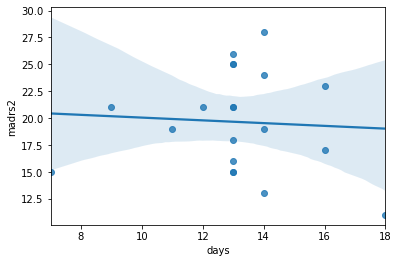

In [23]:
sns.regplot(x='days', y='madrs2', data=sorted_data)


3.The graph presented aimed to investigate the potential correlation between the number of days of participation in the study and the corresponding scores obtained by the test subjects. The hypothesis posited that an increase in the number of days would lead to lower final test scores, indicative of an improvement in the tested depression characteristics as observed in the initial test. However, a careful examination of the graph reveals that no discernible connection exists between these two factors.

The scatterplot displays a notable dispersion of data points around the regression line, indicating a lack of consistent relationship or uniform trend between the number of study days and the final test scores. This lack of compatibility further substantiates the absence of a direct association between the duration of participation and the observed changes in depression characteristics as measured by the tests.

Therefore, I decided whether it is possible to predict the final test scores according to other predetermined indicators that are not related to the number of days or the types of subjects, that what we discovered earlier has a representative in the score in this test

## model that predict the final grade of the subjects according to several parameters

In [24]:
dep_df['age']= dep_df['age'].astype('category').cat.codes


In [25]:
features =['M','F','afftype_bipolar II','afftype_unipolar depressive','afftype_bipolar I','age','madrs1']
X = dep_df[features]
y = dep_df['madrs2']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2) 

madrs2model = DecisionTreeRegressor(max_depth=3,random_state=2)
madrs2model = madrs2model.fit(X_train,y_train)

In [26]:
def eval(x_test,y_test,model):
    pred = model.predict(x_test)
    y_alt=y_test.values.reshape((-1,1))
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y_alt,squared=False)))
    
eval(X_test,y_test,madrs2model)
print("Depth:", madrs2model.get_depth())

Acc: 0.028
MSE: 3.002
Depth: 3


In [27]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(20,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()

Acc: 0.028
MSE: 3.002


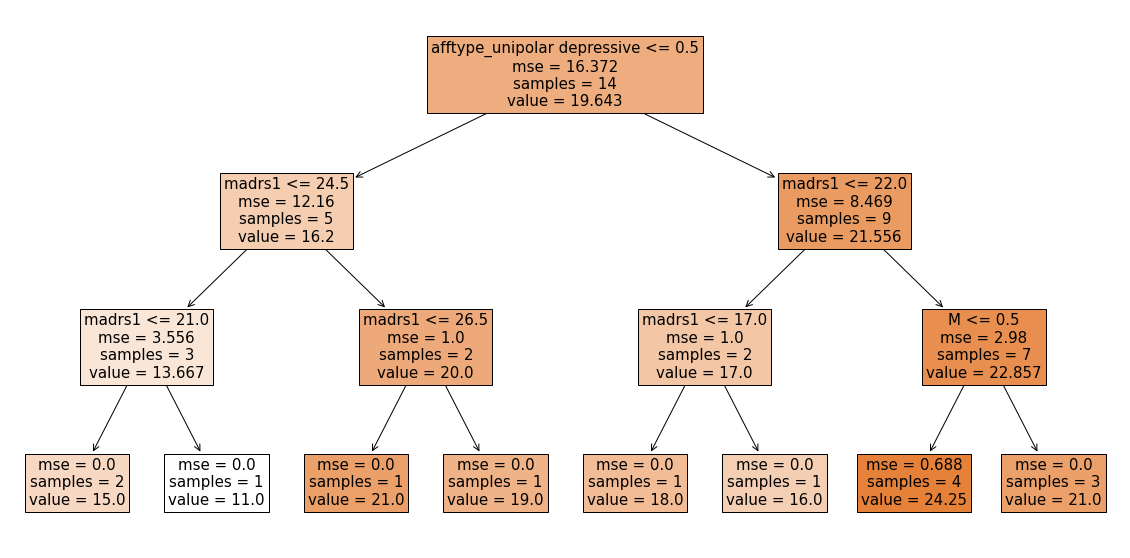

In [28]:
model = DecisionTreeRegressor(max_depth=3,random_state=2)
model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,X_test.columns,size=(20,10))

Based on the analysis of the data, several conclusions can be drawn. Firstly, it was observed that individuals characterized by unipolarity (clinical depression) tend to have higher rates of marriage and integration into the labor market compared to those characterized by bipolarity. This suggests that unipolarity may be considered the "milder" form of the three depressions examined.

Initially, there was an assumption that the type of disease would have an impact on the final grade. However, further examination revealed that while the type of illness did affect the scores, the primary factor leading to improvement was actually gender. It was observed that improvements in depression characteristics were more pronounced among men compared to women. Thus, gender emerged as the key differentiating factor influencing the decrease in depressive traits.

Additionally, an investigation was carried out to determine whether the number of days of treatment influenced the final grade. However, the analysis demonstrated that there was no clear connection between the duration of treatment and the final grade. Consequently, it was concluded that the prediction of the final grade based on the number of treatment days cannot be achieved using the created model.

In summary, the findings highlight the importance of considering gender as a significant factor in the manifestation and improvement of depressive characteristics. Furthermore, the lack of a definitive relationship between the duration of treatment and the final grade underscores the complexity of predicting outcomes solely based on treatment duration.
